### Importing CSV Data

In [1]:
#Importing CSV Data
import csv
#Create blank lists to store columns
#I collect all columns for to be to do all sorts of analysis
order_id = []
shop_id = []
user_id = []
order_amount = []
total_items = []
payment_method = []
created_at = []

#open file
with open('C:/Users/dhack/OneDrive/Desktop/Career/Shopify/Data Science Challenge.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    #Collecting and cleaning the data
    #Skip first row (header)
    next(csv_reader)
    for lines in csv_reader: #loop through each record
        order_id.append(lines[0].strip())
        shop_id. append(lines[1].strip())
        user_id. append(lines[2].strip())
        order_amount. append((float(lines[3].strip().replace('$','').replace(',','')))) 
        total_items. append(int(lines[4].strip()))
        payment_method. append(lines[5].strip())
        created_at. append(lines[6].strip())

#close file
csv_file.close

#I do this to make sure this part of the script runs correctly
print("Importing Successful")

Importing Successful


### Finding How Shopify derived their AOV

In [2]:
#The first step in my analysis is to understand how Shopify derived their AOV
from statistics import *
AOV1 = mean(order_amount)

print("AOV based on mean distribution is = $",round(AOV1, 2))

AOV based on mean distribution is = $ 3145.13


C:\Users\dhack\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Order Amount Distribution'}, xlabel='$ Amount', ylabel='Density'>

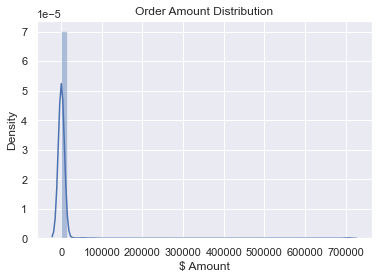

In [3]:
#Next I will visualize the data to get a broad understanding of what is happening
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
plt.title('Order Amount Distribution')
plt.xlabel('$ Amount')
sns.distplot(order_amount, kde = True)

#OUTCOME: The distribution is right tailed skewed meaning there is probably some outliers

### My Solution

Text(0.5, 0, 'Orders')

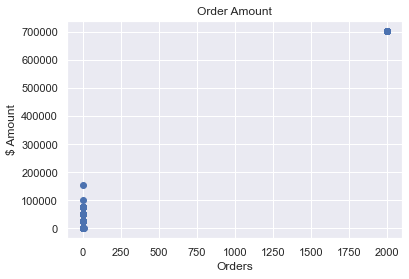

In [4]:
#Here is another visual to see how the data plotted and skewed
plt.scatter(total_items,order_amount)
plt.title('Order Amount')
plt.ylabel('$ Amount')
plt.xlabel('Orders')

#OUTCOME: Here we get a better understanding of how large the outliers are

In [5]:
#Here I do a small statical analysis, seeing how much the values vary
PriceMax = max(order_amount)
PriceMin = min(order_amount)
PriceRange = PriceMax - PriceMin

#OUTCOME: Print statement below
print("The order values start with a minimum of ${} and a maximum of ${} ranging the data ${} meaning the data is right tail skewed.".format(PriceMin, PriceMax,PriceRange))

The order values start with a minimum of $90.0 and a maximum of $704000.0 ranging the data $703910.0 meaning the data is right tail skewed.


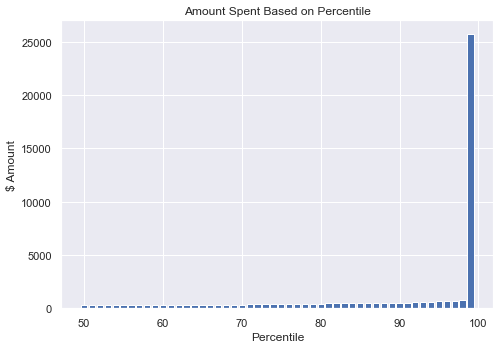

In [6]:
#Here we see what percentile of the data is skewing the distribution

#Create empty lists to store information to visialize
percentiles = []
Names = []
#loop through the last 50 percent of the values
for i in range(0,50):
    val = np.percentile(order_amount,[50 + i])
    percentiles.extend(val)
    Names.append(50+i)

#visialize
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Names,percentiles)
plt.title('Amount Spent Based on Percentile')
plt.xlabel('Percentile')
plt.ylabel('$ Amount')
plt.show()

#OUTCOME: We can see that the data is mostly skewed by the last 99 percentile of the values

In [7]:
#Here I want to understand what that last percentile is doing to the data

#function to count the amounts ordered in the last percentile
def OrderAmount(data, amount):
    large_amount_order_list = [] #empty list to store values
    x = 0 #counter
    for i in data: #loop through the entire column of data
        if i > amount: 
            x = 1 + x #after each iteration add to counter
    large_amount_order_list.append(x)
    return large_amount_order_list


largest_percentile = np.percentile(order_amount,[99]) #Find the last percentile value for the function

second_largest_percentile = np.percentile(order_amount,[98]) #Find the second last percentile to compare to the last

Larger_Order_Amount= OrderAmount(order_amount,largest_percentile) #Run function to count the amount of values in 99th percentile

percent_change = ((largest_percentile - second_largest_percentile)/second_largest_percentile)*100 #Percent change from the second last percentile to the first last percentile

#OUTCOME: Print statement below
print("There are {} orders in the 99th percentile that skew the data by {}% from the previous percentile.".f

ormat(Larger_Order_Amount[0],round(percent_change[0],3)))

There are 44 orders in the 99th percentile that skew the data by 3115.303% from the previous percentile.


Text(0.5, 0, 'Order Amounts')

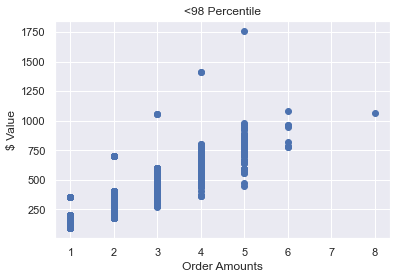

In [8]:
#Here we filter out the 99th percentile to get a better understanding of more realistic data set
order_amount_int = [int(item) for item in order_amount] #I had to clean both these columns into ints so the for loop would work
total_items_int = [int(item) for item in total_items]

i = 0 #index counter
for dollar in order_amount_int:
    if dollar > 20000: #for some reason I was not able to refere back to the variable so instead I used a baseline based on what the 99th percentile was
        order_amount_int.pop(i) #remove values larger than baseline
        total_items_int.pop(i)
    i = i + 1


plt.scatter(total_items_int,order_amount_int)
plt.title('<98 Percentile')
plt.ylabel('$ Value')
plt.xlabel('Order Amounts')

#OUTCOME: As we can see, the data is more accurate using this filtered set

In [9]:
#Based on the previous analysis I found that using a median value will be a better represention of what the AOV should be closer to
#Because we use the median value it is recommeded we use an IQR instead of standard deviation because the mean is skewed

AOV2 = median(order_amount)
Q3,Q1 = np.percentile(order_amount, [75, 25])
IQR = Q3 - Q1

#OUTCOME: Print statement below
print("AOV based on median distribution is = ${}, meaning better a use of deviation would be an IQR of ${} because the mean is skewed.".format(IQR,round(AOV2, 2)))

AOV based on median distribution is = $227.0, meaning better a use of deviation would be an IQR of $284.0 because the mean is skewed.


<ipython-input-10-8db845507e96>:49: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


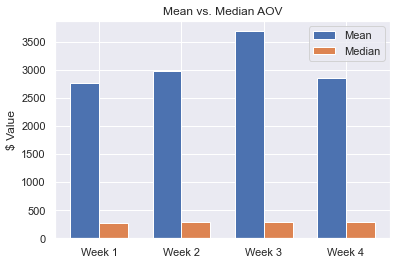

In [10]:
#Now that we have a good understanding of AOV I found it would be good to compare the median to mean values on a weekly basis

#compile and sort two lists
zipped_list = zip(created_at, order_amount)
sorted_pairs =sorted(zipped_list)

#created lists to store weekly values
week1 = []
week2 = []
week3 = []
week4 = []
for i in sorted_pairs: #loop through complied list and append based on dates
    if i[0] <= '2017-03-07':
        week1.append(i[1])
    elif i[0] <= '2017-03-14':
        week2.append(i[1])
    elif i[0] <= '2017-03-21':
        week3.append(i[1])
    elif i[0] <= '2017-03-31':
        week4.append(i[1])

#Here we have the mean values of each week
AOVmean = []
AOVmean.append(mean(week1))
AOVmean.append(mean(week3))
AOVmean.append(mean(week4))
AOVmean.append(mean(week2))

#Here we have the median values of each week
AOVmedian = []
AOVmedian.append(median(week1))
AOVmedian.append(median(week2))
AOVmedian.append(median(week3))
AOVmedian.append(median(week4))

labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4'] #lables for the x axis

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots() #Creating Figure
rects1 = ax.bar(x - width/2, AOVmean, width, label='Mean') #Both bar values

rects2 = ax.bar(x + width/2, AOVmedian, width, label='Median')

# Adding text for labels.
ax.set_ylabel('$ Value')
ax.set_title('Mean vs. Median AOV')
ax.set_xticks(x, labels)
ax.legend()

plt.xticks(x, labels)
plt.show()

#OUTCOME: As we can see, the mean value is highly skewing the data on a week to week basis, whereas the AOV should be closer to the median